In [1]:
#Data Augmentation
#Conv,Maxpooling
#How machine look

In [2]:
#make directory of images
import os

base_dir = 'C:/Users/pongsasit/Desktop/code/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir =os.path.join(base_dir,'test')

In [4]:
#make model
from keras import layers,models

model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#cat or dog = binary classification so use sigmoid
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

In [5]:
#use this optimizer for training
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [7]:
#rescale by 1/255
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20 ,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20 ,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [9]:
for data_batch , labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

#data =20samples,size 150*150,rgb 3 color
#batch = 20 samples

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [10]:
#train this model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 6,
    validation_data =validation_generator,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
100/100 [==============================] - 67s 665ms/step - loss: 0.6921 - acc: 0.5130 - val_loss: 0.6775 - val_acc: 0.5360
Epoch 2/6
100/100 [==============================] - 66s 657ms/step - loss: 0.6610 - acc: 0.6005 - val_loss: 0.6415 - val_acc: 0.6370
Epoch 3/6
100/100 [==============================] - 66s 658ms/step - loss: 0.6174 - acc: 0.6585 - val_loss: 0.6131 - val_acc: 0.6630
Epoch 4/6
100/100 [==============================] - 65s 655ms/step - loss: 0.5764 - acc: 0.6930 - val_loss: 0.5909 - val_acc: 0.6780
Epoch 5/6
100/100 [==============================] - 66s 657ms/step - loss: 0.5370 - acc: 0.7190 - val_loss: 0.5764 - val_acc: 0.6860
Epoch 6/6
100/100 [==============================] - 66s 657ms/step - loss: 0.5124 - acc: 0.7515 - val_loss: 0.5619 - val_acc: 0.7120


In [13]:
#see how fit this model is
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

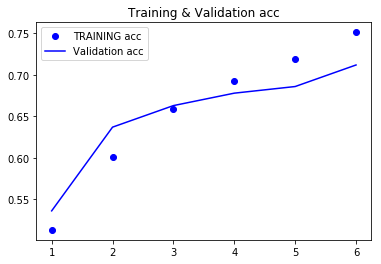

<Figure size 432x288 with 0 Axes>

In [14]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'bo',label = 'TRAINING acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.figure()

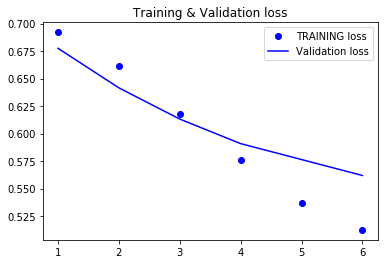

In [15]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'bo',label = 'TRAINING loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()

In [17]:
#Now we will increase the accuracy using data augmentation
#data augmentation
datagen = ImageDataGenerator(rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')

In [30]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',
                        input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [31]:
#rescale and rotatiom
train_datagen = ImageDataGenerator(rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,)
#only rescale for test set
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32 ,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 32 ,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 6,
    validation_data =validation_generator,
    validation_steps=10)

Epoch 1/6
100/100 [==============================] - 87s 875ms/step - loss: 0.6942 - acc: 0.5025 - val_loss: 0.6823 - val_acc: 0.5281
Epoch 2/6
100/100 [==============================] - 85s 854ms/step - loss: 0.6805 - acc: 0.5509 - val_loss: 0.6571 - val_acc: 0.6094
Epoch 3/6
100/100 [==============================] - 85s 854ms/step - loss: 0.6707 - acc: 0.5825 - val_loss: 0.6563 - val_acc: 0.6062
Epoch 4/6
100/100 [==============================] - 85s 850ms/step - loss: 0.6557 - acc: 0.6062 - val_loss: 0.6206 - val_acc: 0.6554
Epoch 5/6
100/100 [==============================] - 86s 857ms/step - loss: 0.6459 - acc: 0.6225 - val_loss: 0.5958 - val_acc: 0.7031
Epoch 6/6
100/100 [==============================] - 85s 850ms/step - loss: 0.6234 - acc: 0.6503 - val_loss: 0.6722 - val_acc: 0.6000


In [33]:
#see how fit data is
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

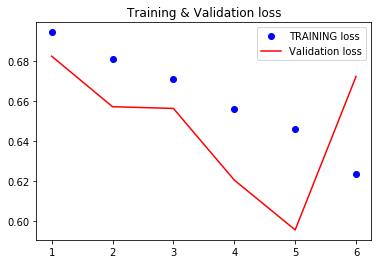

In [34]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'bo',label = 'TRAINING loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

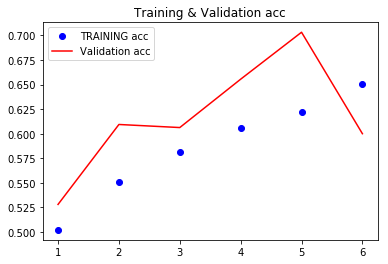

<Figure size 432x288 with 0 Axes>

In [35]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'bo',label = 'TRAINING acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.figure()

In [36]:
#see how convolution see the picture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [37]:
img_path = 'C:/Users/pongsasit/Desktop/code/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


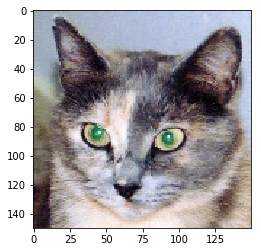

In [38]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [39]:
result = model.predict(img_tensor)
#training_set.class_indices
if result[0][0] == 1:
    print ('dog')
else:
    print ('cat')

cat


In [40]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs=layer_outputs)

In [41]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


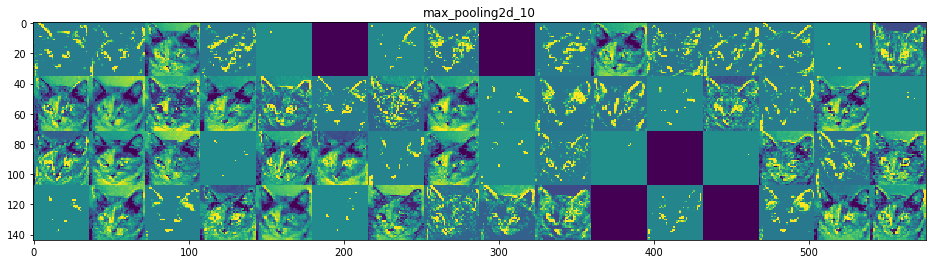

In [74]:
layer_names = []
for layer in model.layers[:4] :
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row  * size))
        
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
scale = 1. / size
plt.figure(figsize = (scale * display_grid.shape[1],
                     scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

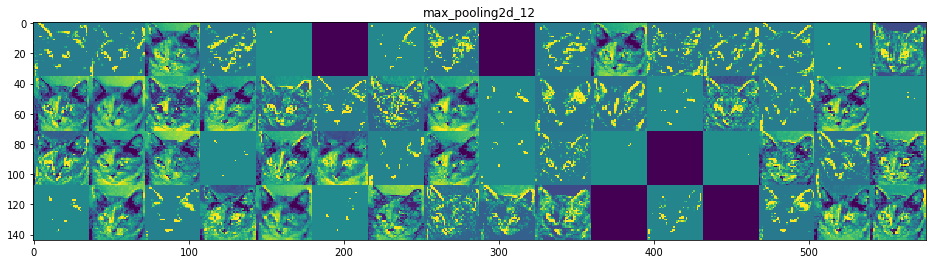

In [76]:
layer_names = []
for layer in model.layers[4:8] :
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row  * size))
        
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
scale = 1. / size
plt.figure(figsize = (scale * display_grid.shape[1],
                     scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

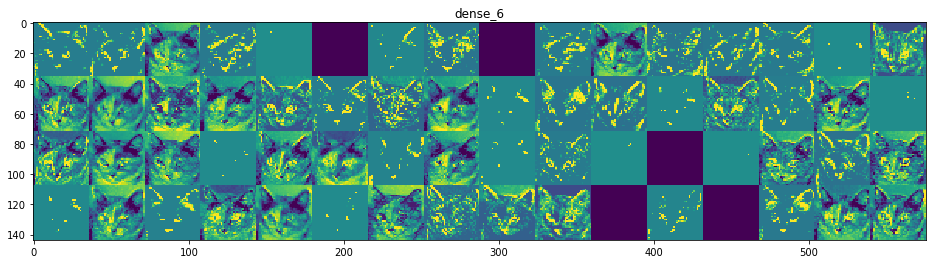

In [77]:
layer_names = []
for layer in model.layers[8:12] :
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row  * size))
        
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
scale = 1. / size
plt.figure(figsize = (scale * display_grid.shape[1],
                     scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

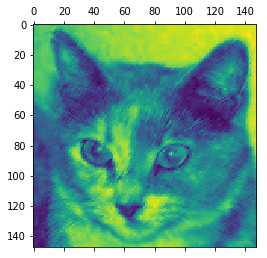

In [53]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

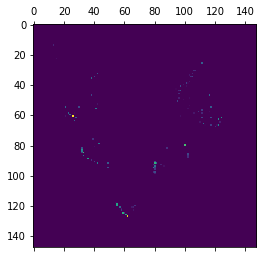

In [57]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')